In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
import subprocess

In [79]:
def run_process(name, no_iters=5, count=1_000_000, domains=16, validate=False):
    cmd = ["../_build/default/benchmarks/bench.exe", name, "-D", str(domains), "--no-iter", str(no_iters), "--count", str(count)]
    if validate:
        cmd += "-T"
    result = subprocess.run(cmd, capture_output=True)
    [time, _, var] = result.stdout.decode("utf-8").split()
    time = time.removesuffix("s").strip()
    var = var.removesuffix("s").strip()
    print(f"time for {name} with {count} inserts was {time} +- {var}")
    return float(time), float(var)

In [80]:
run_process("btree-coarse", count=100)

time for btree-coarse with 100 inserts was 0.00021 +- 0.00008


(0.00021, 8e-05)

In [81]:
results = []
count = 100_000
for i in tqdm(range(1, 16)):
    time_batched,var_batched = run_process("btree-batched", count=count, domains=i)
    time_coarse, var_coarse = run_process("btree-coarse", count=count, domains=i)
    time_sequential, var_sequential = run_process("btree-sequential", count=count, domains=i)
    results.append({
        'domains': i,
        'batched': time_batched, 'batched_var': var_batched,
        'coarse': time_coarse, 'coarse_var': var_coarse,
        'sequential': time_sequential, 'sequential_var': var_sequential
    })

  0%|          | 0/15 [00:00<?, ?it/s]

time for btree-batched with 100000 inserts was 0.20259 +- 0.01006
time for btree-coarse with 100000 inserts was 0.16116 +- 0.00594
time for btree-sequential with 100000 inserts was 0.11638 +- 0.00391
time for btree-batched with 100000 inserts was 0.19307 +- 0.01639
time for btree-coarse with 100000 inserts was 0.21511 +- 0.00770
time for btree-sequential with 100000 inserts was 0.12194 +- 0.00347
time for btree-batched with 100000 inserts was 0.20562 +- 0.01090
time for btree-coarse with 100000 inserts was 0.27809 +- 0.02461
time for btree-sequential with 100000 inserts was 0.13268 +- 0.00572
time for btree-batched with 100000 inserts was 0.18571 +- 0.00213
time for btree-coarse with 100000 inserts was 0.26034 +- 0.02716
time for btree-sequential with 100000 inserts was 0.12126 +- 0.00251
time for btree-batched with 100000 inserts was 0.18221 +- 0.00936
time for btree-coarse with 100000 inserts was 0.25672 +- 0.02037
time for btree-sequential with 100000 inserts was 0.11710 +- 0.00319


In [82]:
times = [data['domains'] for data in results]
batched = [data['batched'] for data in results]
coarse = [data['coarse'] for data in results]
sequential = [data['sequential'] for data in results]

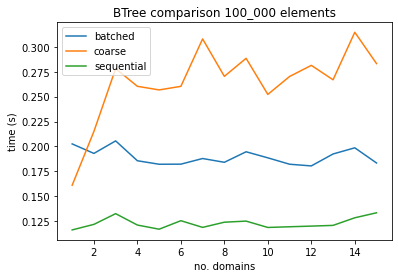

In [83]:
plt.plot(times, batched, label='batched')
plt.plot(times, coarse, label='coarse')
plt.plot(times, sequential, label='sequential')
plt.title('BTree comparison 100_000 elements')
plt.xlabel('no. domains')
plt.ylabel('time (s)')
plt.legend()
plt.show()